In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df =pd.read_csv("crop_yield_data[1].csv")
df.head()

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
0,1626,9,636,11,1006,404
1,1959,9,73,11,112,115
2,1360,1,352,5,702,231
3,1794,2,948,7,299,537
4,1630,5,884,5,2733,554


In [3]:
df.columns

Index(['rainfall_mm', 'soil_quality_index', 'farm_size_hectares',
       'sunlight_hours', 'fertilizer_kg', 'crop_yield'],
      dtype='object')

In [4]:
df.describe()

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1263.095000,5.506667,498.801000,7.995333,1549.450333,328.099000
std,432.371756,2.855172,287.122742,2.621501,814.326919,145.036503
min,500.000000,1.000000,10.000000,4.000000,100.000000,46.000000
25%,896.000000,3.000000,242.000000,6.000000,869.750000,199.000000
50%,1277.000000,6.000000,505.000000,8.000000,1542.000000,332.000000
75%,1636.000000,8.000000,741.000000,10.000000,2225.000000,455.000000
max,2000.000000,10.000000,1000.000000,12.000000,3000.000000,628.000000


In [5]:
len(df)

3000

In [6]:
df.isnull().sum()

,0
rainfall_mm,0
soil_quality_index,0
farm_size_hectares,0
sunlight_hours,0
fertilizer_kg,0
crop_yield,0


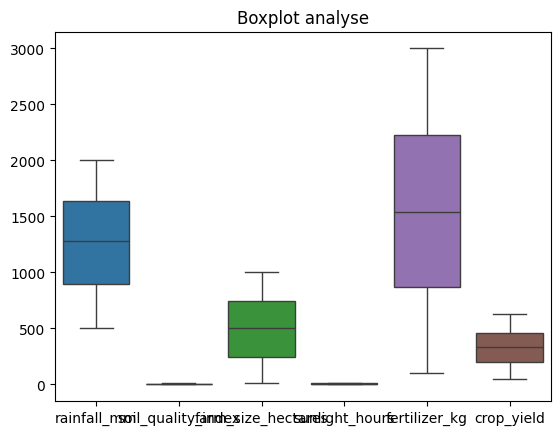

In [7]:
import seaborn as sns
sns.boxplot(data=df[['rainfall_mm','soil_quality_index','farm_size_hectares','sunlight_hours','fertilizer_kg','crop_yield']])
plt.title('Boxplot analyse')
plt.show()

In [8]:
column=['rainfall_mm','soil_quality_index','farm_size_hectares','sunlight_hours','fertilizer_kg','crop_yield']
z_score=np.abs((df[column]-df[column].mean()))/df[column].std()
outlairs=(z_score>=3)
df_cleaned=df[(z_score<=3).all(axis=1)]
df=df_cleaned
df

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
0,1626,9,636,11,1006,404
1,1959,9,73,11,112,115
2,1360,1,352,5,702,231
3,1794,2,948,7,299,537
4,1630,5,884,5,2733,554
...,...,...,...,...,...,...
2995,1483,9,78,12,2739,155
2996,804,9,481,4,1898,319
2997,870,1,113,7,2282,129
2998,1352,6,767,11,2901,493


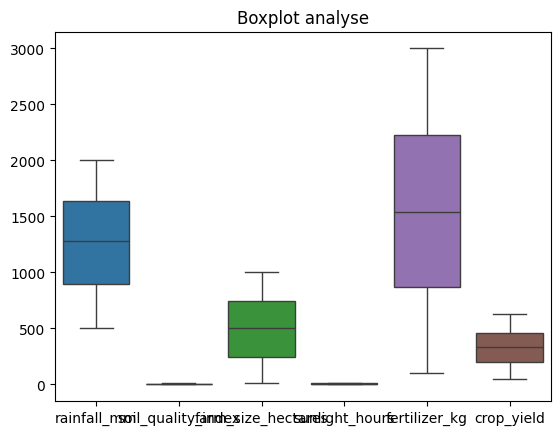

In [9]:
import seaborn as sns
sns.boxplot(data=df_cleaned[['rainfall_mm','soil_quality_index','farm_size_hectares','sunlight_hours','fertilizer_kg','crop_yield']])
plt.title('Boxplot analyse')
plt.show()

In [10]:
X=df.drop('crop_yield',axis=1)
Y=df["crop_yield"]

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=42)

In [14]:
model =LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9999961820468685

In [15]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [17]:
import joblib
joblib.dump(model, 'modely.pkl')

['modely.pkl']

In [19]:
from google.colab import files
files.download('modely.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>